# Linear Regression

## A preamble
Linear models are extremely useful becase they can be used to approximate complex relationships with easy and interpretable models. When employing linear models to learn a function $f$ relating $Y$ to $X$, we do not need to necessarily assume that the relationship between $X$ and $Y$ is linear. We are just looking for the best linear approximation to the true relationship, whatever that might be. Taylor's theorem gives reasons to believe that a linear model is a sensible approximation even for more complex functions, at least locally. Indeed, if the true regression function $f(x)$ is a smooth function, given a specific value $x_0$, we can expand the function as

\begin{equation}
    f(x) = f(x_0) + \frac{f'(x_0)}{1!}(x-x_0) + \frac{f''(x_0)}{2!}(x-x_0)^2 + \cdots
\end{equation}

This expansion breaks down the function into an infinite sum of terms based on the function's derivatives at $x_0$. The approximation starts with the function's value at $x_0$, then adds adjustments based on how the function changes (its derivatives) as you move away from $x_0$. For $x$ close enough to $x_0$, we can get away with truncating the series at first order, as in

\begin{equation}
    f(x) \approx f(x_0) + f'(x_0)(x-x_0)
\end{equation}

When you truncate the Taylor series after the first derivative term, we are essentially creating a linear model. This model approximates the function $f(x)$ using a straight line that tangentially matches the function's slope at $x_0$. This approach is valid as long as the higher-order terms (like the quadratic term and beyond) are negligible, which usually means $x$ is close enough to $x_0$. Thus, while a  linear approximation may work well locally (near $x_0$), extending this approximation globally (over a wide range of $x$ values) may not always be accurate unless the function is nearly linear over that range. The key to a successful linear approximation lies in determining how "close" $x$ must be to $x_0$ for the higher-order terms to be negligible. For a linear approximation to be valid, we want the influence of this term (and all higher-order terms) to be small compared to the first derivative term. We formalize this by imposing that the linear term dominates over the quadratic

\begin{equation}
    |x-x_0|f'(x_0) \gg \frac{f''(x_0)}{2}
\end{equation}

which is true if 

\begin{equation}
    2\frac{f'(x_0)}{f''(x_0)} \gg |x-x_0|
\end{equation}

This tells us that the distance between $x$ and $x_0$ must be smaller than twice the ratio of the magnitude of the first derivative to the magnitude of the second derivative for the linear approximation to hold effectively. The exact bounds of "close enough" depend on the relative sizes of the first and second derivatives of the function at $x_0$, providing a rule of thumb for when a linear model is likely to be a good approximation.

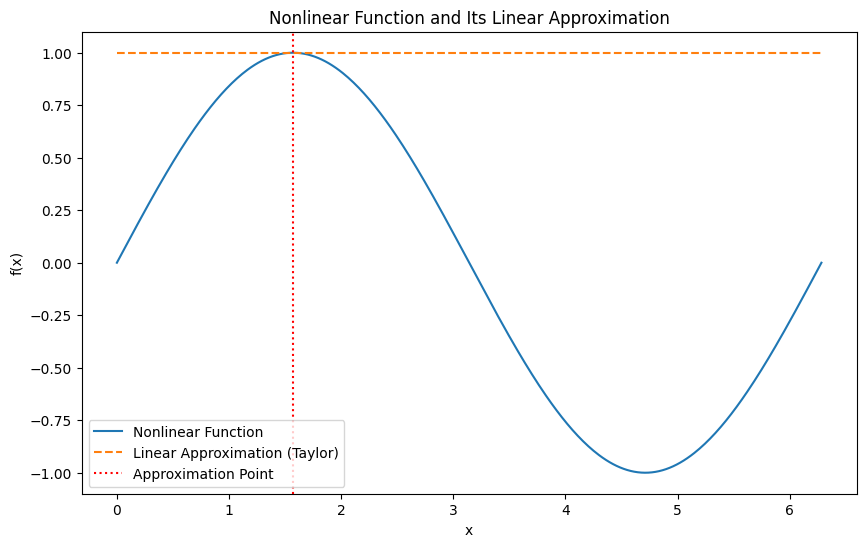

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define a nonlinear function and its linear approximation
def nonlinear_function(x):
    return np.sin(x)

def linear_approximation(x, x0):
    return np.sin(x0) + np.cos(x0) * (x - x0)

x = np.linspace(0, 2 * np.pi, 400)
x0 = np.pi / 2  # point of approximation

y = nonlinear_function(x)
y_approx = linear_approximation(x, x0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Nonlinear Function')
plt.plot(x, y_approx, linestyle='--', label='Linear Approximation (Taylor)')
plt.axvline(x0, color='r', linestyle=':', label='Approximation Point')
plt.title('Nonlinear Function and Its Linear Approximation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()


## Now to linear regression

A linear regression model is a model used to analyze the relationship between a dependent variable (response) and one or more independent variables (predictors or covariates). In the case of one predictor, the linear regression model is referred to as a simple linear regression model, and it is given by

\begin{equation}
    y_i = \beta_0 + \beta_1 x_i + \epsilon_i
\end{equation}

 where $y_i$ is the $i$th observation of the response variable, $x$ is the $i$th observation of the predictor, $\beta_0$ is the intercept (the value of $y$ when $x$ is zero), $\beta_1$ is the regression coefficient (the expected change in $y$ per unit change in $x$), and $\epsilon$ represents the error term, accounting for the variability in $y$ that cannot be explained by the linear relationship with $x$. In most of the cases, we will assume $\epsilon$ to be normally distributed around zero with finite variance, $\epsilon \sim \mathcal{N}(0, \sigma^2)$. In the case of $p$ predictors and $n$ observations, the model is referred to as a multiple linear regression model, and we can express it in matrix notation, as in

\begin{equation}
    \mathbf{y}=\mathbf{X} \boldsymbol{\beta}+\boldsymbol{\epsilon}
\end{equation}

where
\begin{equation*}
    \mathbf{y}=\left[\begin{array}{c}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{array}\right], \quad \mathbf{X}=\left[\begin{array}{ccccc}
1 & x_{11} & x_{12} & \cdots & x_{1 p} \\
1 & x_{21} & x_{22} & \cdots & x_{2 p} \\
\vdots & \vdots & & \vdots \\
1 & x_{n 1} & x_{n 2} & \cdots & x_{n p}
\end{array}\right], \quad \boldsymbol{\beta}=\left[\begin{array}{c}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_p
\end{array}\right], \quad \text { and } \quad \boldsymbol{\epsilon}=\left[\begin{array}{c}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_n
\end{array}\right]
\end{equation*}


$\mathbf{y}$ is a $n \times 1$ vector of response variables, $\mathbf{X}$ is a $n \times (p + 1)$ model matrix, $\boldsymbol{\beta}$ is a $(p + 1) \times 1$ vector of regression coefficients, and $\boldsymbol{\epsilon}$ is a $n \times 1$ vector representing the noise, with covariance matrix $\sigma^2 \mathbf{I}$. If the predictors and the response are centered (for example by subtracting the mean), the intercept term can be removed from the model. In that case, the size of the model matrix becomes $n \times p$, and $\boldsymbol{\beta}$ a $p \times 1$ vector. We will assume this is the case in the following sections. 

Linear regression models are based on several **key assumptions**:
- **Linearity**: the relationship between the predictors and the response is linear. This implies that a change in a predictor leads to a proportional change in the response. While real-life processes are rarely purely linear, we can often assume local linearity. This means that the linearity assumption holds within a reasonably limited range of the design space, recognizing that the relationship may not be linear over a wider range.
- **Independence**: observations are independent of each other. In other words, the observations do not influence each other. This assumption can be violated in many situations, particularly in time series data or spatial data where there might be autocorrelation (i.e., the value of a variable at one point in time or space is correlated with its values at other points).
- **Homoscedasticity**: the variance of the error terms (residuals) is constant across all levels of the independent variables. This condition, known as homoscedasticity, implies that the spread of the residuals should be roughly the same for all values of the predictors. If the variance of the residuals changes with the level of the predictors, the condition is known as heteroscedasticity, which can lead to inefficiencies and bias in the estimation of parameters.
 - **Normality of the error terms**: this assumption is particularly important for hypothesis testing and creating confidence intervals. It's crucial to note that this assumption pertains to the errors, not necessarily to the distributions of the predictors or the response variable. While linear regression can be robust to mild violations of this assumption, severe departures can affect the reliability of inference procedures


### Ordinary least squares
In regression analysis, the most common method to estimate the unknown model parameters $\mathbf{\beta}$ is ordinary least squares (OLS). The OLS method seeks to find the coefficients that minimize the sum of squares of the errors, $\epsilon_i$. Recall that a key assumption in linear regression models is that $\{\epsilon_i\}$ are uncorrelated random variables. We aim to find the vector of least squares estimators $\boldsymbol{{beta}}$ that minimizes

\begin{equation}
    \mathcal{L} = \sum_{i=1}^{n} \epsilon_i^2 = \boldsymbol{\epsilon}^\top\boldsymbol{\epsilon} 
\end{equation}

Because $\mathbf{y}=\mathbf{X} \boldsymbol{\beta}+\boldsymbol{\epsilon}$, we can express $\boldsymbol{\epsilon} = \mathbf{y} - \mathbf{X} \boldsymbol{\beta}$. So, we have

\begin{align}
    \mathcal{L} 
    &= (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) \\
    &= (\mathbf{y}^\top - \boldsymbol{\beta}^\top\mathbf{X}^\top) (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) \\
    &= \mathbf{y}^\top \mathbf{y} - \mathbf{y}^\top \mathbf{X} \boldsymbol{\beta} - \boldsymbol{\beta}^\top\mathbf{X}^\top \mathbf{y} + \boldsymbol{\beta}^\top\mathbf{X}^\top \mathbf{X}\boldsymbol{\beta} \\
    &= \mathbf{y}^\top \mathbf{y} - 2 \boldsymbol{\beta}^\top\mathbf{X}^\top \mathbf{y} + \boldsymbol{\beta}^\top\mathbf{X}^\top \mathbf{X}\boldsymbol{\beta}
\end{align}


 Note that $\mathbf{y}^\top \mathbf{X} \boldsymbol{\beta}$ is a scalar, because we have $(1 \times n) \times (n \times p) \times (p \times 1)$, resulting in a $1 \times 1$ matrix, which is a scalar. Similarly, $\boldsymbol{\beta}^\top\mathbf{X}^\top \mathbf{y}$, having dimensions $(1 \times p) \times (p \times n) \times (n \times 1)$, also results in a $1 \times 1$ matrix, or scalar. Moreover, due to the properties of transposition and the commutative property of scalar multiplication, these two expressions are not only scalars but also represent the same scalar value. Transposing a scalar does not affect its value, thus we have $(\mathbf{y}^\top \mathbf{X} \boldsymbol{\beta})^\top=\boldsymbol{\beta}^\top\mathbf{X}^\top \mathbf{y}$. Remind that, in matrix multiplication, if we transpose the product of two matrices, we reverse the order of multiplication and transpose each matrix: $(\mathbf{A}\mathbf{B})^\top=\mathbf{B}^\top \mathbf{A}^\top$.

Now, we need to get the derivative of $\mathcal{L}$ with respect to the parameter vector $\boldsymbol{\beta}$ and set it to zero. This way we will find the estimated coefficients $\mathbf{b}$.

\begin{equation}
    \frac{\partial \mathcal{L}}{\partial \boldsymbol{\beta}} \Bigr|_{\widehat{\boldsymbol{\beta}}} = - 2 \mathbf{X}^\top \mathbf{y} + 2 \mathbf{X}^\top \mathbf{X}\widehat{\boldsymbol{\beta}} = \mathbf{0}
\end{equation}

which simplifies to 

\begin{equation}
    \mathbf{X}^\top \mathbf{X}\widehat{\boldsymbol{\beta}} = \mathbf{X}^\top \mathbf{y}
\end{equation}

Multiplying both sides by the inverse of $\mathbf{X}^\top \mathbf{X}$ we get the OLS estimate

\begin{equation}
    \widehat{\boldsymbol{\beta}} = (\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \mathbf{y}
\end{equation}

The matrix $\mathbf{X}^\top \mathbf{X}$ is sometimes referred to as the Gram matrix or the moment matrix, because it contains the ``second moments'' (i.e., variances and covariances) of the independent variables. The diagonal elements are the sums of squares of each predictor, and the off-diagonal elements represent the sums of cross-products (or covariances) between different predictors. The fitted regression model is then given by

\begin{equation}
    \widehat{\mathbf{y}} = \mathbf{X} \widehat{\boldsymbol{\beta}} = \mathbf{X}(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \mathbf{y} = \mathbf{H}\mathbf{y}
\end{equation}


where the matrix $\mathbf{H}$ is referred to as the hat matrix or influence matrix. We can see how the fitted values at the data points used to estimate the model are linear combinations of the observed responses, with weights given by the hat matrix. Geometrically, this means that we find the fitted values by taking the vector of observed responses $\mathbf{y}$ and projecting it onto a certain plane, which is entirely defined by the values in $\mathbf{X}$. If we repeat our experiment (e.g., survey, observation) many times at the same locations $\mathbf{X}$, we get different responses $\mathbf{y}$ every time. But $\mathbf{H}$ does not change. The properties of the fitted values are thus largely determined by the properties of $\mathbf{H}$.


#### Expected value and variance of the least square estimators

Because we know that $\boldsymbol{\epsilon} \sim \mathcal{N}(\mathbf{0}, \sigma^2\mathbf{I}_n)$, we can say that $\mathbf{y} \sim \mathcal{N}(\mathbf{X} \boldsymbol{\beta}, \sigma^2\mathbf{I}_n)$. Since $\boldsymbol{\epsilon}$ follows a multivariate normal distribution, any linear combination of $\boldsymbol{\epsilon}$ is also multivariate normally distributed, including $\mathbf{y}$. The expectation of $\mathbf{y}$ is $\mathbf{X} \boldsymbol{\beta}$ because $\boldsymbol{\epsilon}$ has expectation zero. Similarly, since $\widehat{\boldsymbol{\beta}}$ is a linear transformation of $\mathbf{y}$, it is also normally distributed.

Assuming the model is correct, we can first evaluate the bias of the OLS estimator by looking at the expected value of $\widehat{\boldsymbol{\beta}}$, which is given by

\begin{align}
    \mathbb{E}[\widehat{\boldsymbol{\beta}}] &= \mathbb{E}[(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \mathbf{y}] \\
    &= \mathbb{E}[(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top (\mathbf{X} \boldsymbol{\beta}+\boldsymbol{\epsilon})] \\
    &= \mathbb{E}[(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \mathbf{X} \boldsymbol{\beta}+(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top\boldsymbol{\epsilon})] \\
    &= \mathbb{E}[\boldsymbol{\beta} + (\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \boldsymbol{\epsilon}] \\
    &= \boldsymbol{\beta}
\end{align}

Thus, $\widehat{\boldsymbol{\beta}}$ is an unbiased estimator of $\boldsymbol{\beta}$ if the model is correct. In the derivation of the expected value we used that $\mathbb{E}[\boldsymbol{\epsilon}]=\mathbf{0}$ and that $(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \mathbf{X}=\mathbf{I}$, and of course the expected value of the constant $\boldsymbol{\beta}$ is $\boldsymbol{\beta}$ itself.

The variance property of $\widehat{\boldsymbol{\beta}}$ is expressed by the covariance matrix 

\begin{equation}
    \operatorname{Cov}[\widehat{\boldsymbol{\beta}}] = \mathbb{E}[(\widehat{\boldsymbol{\beta}}-\mathbb{E}[\widehat{\boldsymbol{\beta}}])(\widehat{\boldsymbol{\beta}}-\mathbb{E}[\widehat{\boldsymbol{\beta}}])^\top]
\end{equation}

which is a $p \times p$ symmetric matrix whose $j$th diagonal element is the variance of $\widehat{\boldsymbol{\beta}}_j$ and whose ($ij$)th off-diagonal element is the covariance between $\widehat{\beta}_i$ and $\widehat{\beta}_j$. The
covariance matrix of $\widehat{\boldsymbol{\beta}}$ is found by applying a variance operator to $\widehat{\boldsymbol{\beta}}$

\begin{equation}
    \operatorname{Cov}[\widehat{\boldsymbol{\beta}}] = \operatorname{Var}[\widehat{\boldsymbol{\beta}}] = \operatorname{Var}[(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \mathbf{y}]
\end{equation}

Now let us remind that, in general, if a vector $\mathbf{v}$ has covariance matrix $\mathbf{C}$ we have that

\begin{equation}
    \operatorname{Cov}[\mathbf{A}\mathbf{v}] = \mathbf{A} \mathbf{C} \mathbf{A}^\top
\end{equation}

where $\mathbf{A}$ is a linear transformation. Thus, knowing that $\mathbf{y}$ has a covariance equal to $\sigma^2\mathbf{I}_n$, we get that

\begin{align}
    \operatorname{Var}[\widehat{\boldsymbol{\beta}}] &= \operatorname{Var}[(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \mathbf{y}]\\ &= (\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top(\sigma^2\mathbf{I}_n)((\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top)^\top \\
    &= \sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \mathbf{I}_n((\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top)^\top \\
    &= \sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \mathbf{X}(\mathbf{X}^\top \mathbf{X})^{-1} \\
    &= \sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1}
\end{align}

Thus, we have that our estimator is normally distributed around the true parameter vector as

\begin{equation}
    \widehat{\boldsymbol{\beta}}|\mathbf{X} \sim \mathcal{N}(\boldsymbol{\beta}, \sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1})
\end{equation}

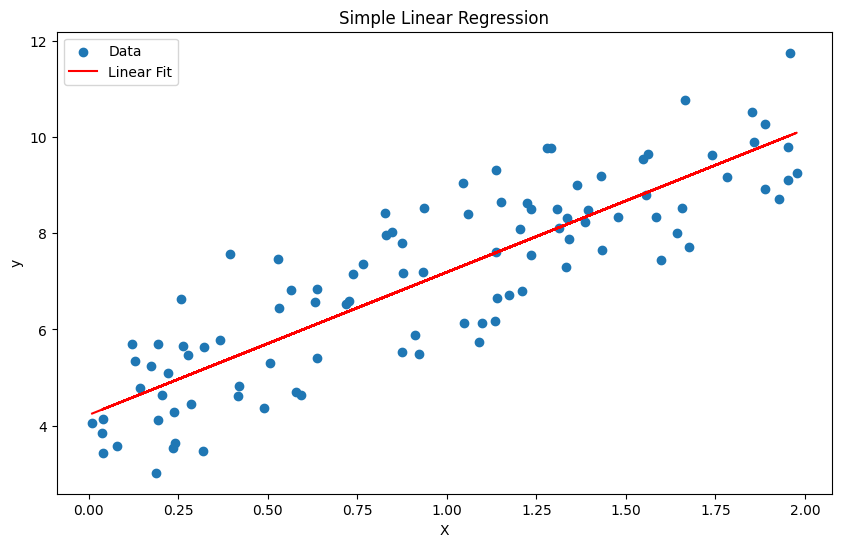

In [2]:
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Fit linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='Linear Fit')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


#### Estimation of $\sigma^2$

We can develop an estimate of $\sigma^2$ from the residual sum of squares, $\operatorname{SS}_E$), given by

\begin{align}
    \operatorname{SS}_E &= \sum_{i=1}^{n}(y_i - \widehat{y}_i)^2 = \\
    &= \sum_{i=1}^{n}e_i^2 = \mathbf{e}^\top\mathbf{e} \\
    & = (\mathbf{y}-\widehat{\mathbf{y}})^\top(\mathbf{y}-\widehat{\mathbf{y}}) \\
    & = (\mathbf{y} - \mathbf{X} \widehat{\boldsymbol{\beta}})^\top(\mathbf{y} - \mathbf{X} \widehat{\boldsymbol{\beta}}) \\  
    &= \mathbf{y}^\top\mathbf{y} - \widehat{\boldsymbol{\beta}}^\top\mathbf{X}^\top\mathbf{y}
\end{align}

then, the residual mean squares, $\operatorname{MS}_E$ is given by

\begin{equation}
    \widehat{\sigma}^2 = \operatorname{MS}_E = \frac{\operatorname{SS}_E}{n-p}
\end{equation}

which has an expected value of $\sigma^2(n-p)$. So, $\operatorname{MS}_E$ is an unbiased estimator for $\sigma^2$. We can also see how the variance of the estimator goes to 0 as $n \rightarrow \infty$. Since the residuals are normally distributed, the estimated error $\widehat{\sigma}^2 $ has a $\chi^2_{n-p}$ distribution, resulting from the sum of squared normal variables.



## Hypothesis testing in multiple linear regression

### Tests for significance of regression (ANOVA)
The test for significance of regression is a test to determine if there is a linear relationship between the response variable $y$ and a subset of the regressor variables $x_1, x_2,\ldots, x_p$. The appropriate hypotheses are

\begin{align}
    H_0 &: \beta_1 = \beta_2 = \ldots = \beta_p = 0 \\
    H_1 &: \beta_j \neq 0 \quad \text{for at least one } j
\end{align}

This test procedure is called an analysis of variance (ANOVA) because it is based on a decomposition of the total variability in the response variable $y$. The total variability in the response variable is measured by the total sum of squares ($\operatorname{SS}_T$), calculated as

\begin{equation}
    \operatorname{SS}_T = \sum_{i=1}^{n} (y_i - \bar{y})^2
\end{equation}

which is used as a measure of overall variability in the data. Intuitively, this is reasonable because if we were to divide $\operatorname{SS}_T$ by the appropriate number of degrees of freedom, we would have the sample variance of the $y$s. This $\operatorname{SS}_T$  is partitioned into

\begin{equation}
    \operatorname{SS}_T = \operatorname{SS}_M + \operatorname{SS}_E
\end{equation}

where $\operatorname{SS}_M$ is the sum of squares due to the regression model($\operatorname{SS}_M$), measuring the explained variation in $ y $, calculated as $ \sum_{i=1}^{n} (\hat{y}_i - \bar{y})^2 $; and $\operatorname{SS}_E$ is the sum of squares due to error ($\operatorname{SS}_E$), measuring the unexplained variation in $ y $, calculated as $ \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $. $\operatorname{SS}_M$ measures the explained variability in the dependent variable due to the independent variables in the regression model. Under the null hypothesis (which typically states that all regression coefficients except the intercept are zero), $\operatorname{SS}_M$ captures variability that is purely due to chance. To reject the null hypotheses and say that a significant part of the variability is explained by the model (thus justifying the existence of at least one coefficient), we would like $\operatorname{SS}_M$ to be significantly larger than $\operatorname{SS}_R$. More formally, we use the test statistic is given by

\begin{equation}
    F_0 = \frac{\operatorname{SS}_M/p}{\operatorname{SS}_E/(n-p-1)} = \frac{\operatorname{MS}_M}{\operatorname{MS}_E}
\end{equation}



Since the residuals are assumed to be normally distributed, $\operatorname{SS}_M$ and $\operatorname{SS}_E$ follow a chi-squared distribution, and their ratio follows an F-distribution. This is why the critical value for the test is given $F_{\alpha, p, n-p-1}$, where $\alpha$ is the confidence level. We reject the null hypothesis $H_0$ if $F_0 > F_{\alpha, p, n-p-1}$. \textbf{ANOVA one factor at the time:} If we have five factors (A, B, C, D, E) and we want to find which factors are significant for a given significance level $\alpha$, we compare $MS_i/MS_E$ for $i=A, \ldots, E$ where the $MS_E$ is usually the pure error that comes from replications (or the whole error?).

**\texttt{f\_regression} (sk-learn function)**
It is quite similar to doing ANOVA and only considering one factor in the model at each time. So we are just saying that the model consists only of one predictor, and everything else goes in the residual. In the \texttt{python} function, this is done in 2 steps. It first computes the correlation between each regressor and the target is computed as in $((X[:, i] - mean(X[:, i])) * (y - mean_y)) / (std(X[:, i]) * std(y))$. Then, it converts it into an F score (and then to a p-value). The key idea is that the squared correlation coefficient corresponds to the coefficient of determination $R^2$, which is the explained variance over total variance. From there, we can work out the F.

In practice, the first step computes the Pearson correlation coefficient ($r$) between each predictor ($x$) and the response ($y$). For a single predictor $X_i$ and response $y$, the correlation coefficient is calculated as

$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

where $\bar{x}$ and $\bar{y}$ are the means of $x$ and $y$, respectively. Next, the correlation coefficient is used to compute the F-statistic, which assesses the overall significance of the model. The F-statistic for a model with one predictor is calculated as:

$$
F = \frac{r^2 / 1}{(1 - r^2) / (n - 2)}
$$

This formula derives from the ratio of explained variance (proportional to $r^2$) to unexplained variance, adjusted for their respective degrees of freedom. The denominator, $(1 - r^2) / (n - 2)$, represents the unexplained variance per degree of freedom in the residuals, with $n - 2$ being the degrees of freedom for residuals in simple regression, the degrees of freedom can also be $n - 2$ based on whether the intercept is included or not in the model (?). The F-test in regression is designed to test whether the model provides a better fit to the data than a model with no predictors. By converting the correlation coefficient to an F-statistic, \texttt{f\_regression} tests the null hypothesis that a given predictor has no linear relationship with the response variable. Rejecting this null hypothesis (i.e., obtaining a small p-value) indicates the predictor is statistically significant.



### Extra sum of squares method (tests on groups of coefficients)
We may also directly examine the contribution to the regression sum of squares for a particular variable, say $x_j$, given that other variables $x_i$ ($i \neq j$) are included in the model. The procedure used to do this is called the extra sum of squares method. This procedure can also be used to investigate the contribution of a subset of the regressor variables to the model. Suppose interest lies in testing the significance of a subset of $r$ regressor variables ($r < p$). The vector of regression coefficients $\boldsymbol{\beta}$ can be partitioned as:
$$
\boldsymbol{\beta} = 
\begin{bmatrix}
\boldsymbol{\beta}_1 \\
\boldsymbol{\beta}_2
\end{bmatrix}
$$
with $\boldsymbol{\beta}_1$ corresponding to the coefficients of the $r$ variables under consideration, and $\boldsymbol{\beta}_2$ to the coefficients of the remaining $p-r$ variables. The hypotheses for assessing the significance of these $r$ variables are structured as follows:

- $H_0: \boldsymbol{\beta}_1 = \mathbf{0}$ suggesting the $r$ variables do not significantly contribute to the model.
- $H_1: \boldsymbol{\beta}_1 \neq \mathbf{0}$ indicating at least one of the $r$ variables significantly contributes.


To evaluate these hypotheses, two models are considered. The full model, inclusive of all $p$ regressor variables, and the reduced model, excluding the $r$ variables of interest, thus only comprising $\boldsymbol{\beta}_2$. Denote the sum of squares for the full model by $\operatorname{SS}_M(\boldsymbol{\beta})$, and for the reduced model by $\operatorname{SS}_M(\boldsymbol{\beta}_2)$. Then, the increase in the regression sum of squares due to $\boldsymbol{\beta}_1$ given that $\boldsymbol{\beta}_2$ is already in the model is given by

\begin{equation}
    \operatorname{SS}_M(\boldsymbol{\beta}_1|\boldsymbol{\beta}_2) = \operatorname{SS}_M(\boldsymbol{\beta}) - \operatorname{SS}_M(\boldsymbol{\beta}_2)
\end{equation}

which is also referred to as extra sum of squares due to $\boldsymbol{\beta}_1$, and has $r$ degrees of freedom. It represents the increase in the regression model sum of squares due to including the new variables (hence the reduction in the sum of squares of the error). Since $\operatorname{SS}_M(\boldsymbol{\beta}_1|\boldsymbol{\beta}_2)$ is independent of $\operatorname{MS}_E$, the hypothesis $H_0: \boldsymbol{\beta}_1 = \mathbf{0}$ can be tested using the statistic


\begin{equation}
    F_0 = \frac{\operatorname{SS}_M(\boldsymbol{\beta}_1|\boldsymbol{\beta}_2)/r}{\operatorname{MS}_E}
\end{equation}

Should $F_0$ surpass the critical value from the F-distribution with $r$ and $n-p$ degrees of freedom ($F_{\alpha,r,n-p}$), the null hypothesis $H_0$ is rejected, affirming that at least one of the $r$ variables significantly impacts the model. This methodology is particularly valuable for its capacity to assess the collective influence of a variable set, rather than evaluating the effect of each variable in isolation. It finds extensive application in model refinement and in the response surface methodology, aiding in the simplification of complex models through the identification and elimination of non-significant variables.

Backward and forward feature selection are iterative methods for model selection where the choice of predictive variables is carried out automatically. These methods are particularly useful in scenarios with many predictors, and they aim to identify the most significant subset that provides the best predictive performance for the model.

\paragraph{Forward selection} It starts with an empty model and adds predictors to the model one at a time. In each step, the variable that provides the most significant improvement to the model's fit is included, until no additional variables improve the model significantly. This can be formally represented as adding the variable that maximizes the decrease in the sum of squares due to error ($\operatorname{SS}_E$) or equivalently, maximizes the increase in the regression sum of squares ($\operatorname{SS}_M$) given the current set of variables. At each step, the significance of adding a new variable is assessed using the extra sum of squares method, where the null hypothesis tests if the coefficient of the variable to be added equals zero.

\paragraph{Backward elimination} It begins with a full model that includes all potential predictors. Variables are removed one at a time, where at each step, the least significant variable, whose removal causes the least decrease in the model fit, is eliminated. The removal of variables is based on the increase in $\operatorname{SS}_E$ or the decrease in $\operatorname{SS}_M$, and the significance of each variable is assessed through the extra sum of squares method. The process continues until all remaining variables in the model are statistically significant.



%Both methods rely on the extra sum of squares method to evaluate the contribution of individual variables or sets of variables to the model's explanatory power. While forward selection can be particularly useful in exploring a wide range of models when the number of predictors is large, backward elimination is efficient in pruning non-significant variables from an overly complex initial model. One critical consideration in applying these methods is the potential for interactions among variables. The extra sum of squares method assesses the contribution of variables conditional on the presence of other variables in the model. As a result, the sequence in which variables are added or removed can influence the final model, especially if predictors are correlated or if there are significant interaction effects. Therefore, while these methods provide a systematic approach to model selection, they may not always yield the optimal model. Additional criteria, such as the Akaike Information Criterion (AIC) or the Bayesian Information Criterion (BIC), may be employed in conjunction with these methods to select a model that balances complexity with fit.

### Tests on individual regression coefficients
Adding a variable to the regression model always causes the sum of squares for the regression model ($\operatorname{SS}_M$) to increase and the error sum of squares to decrease. The hypotheses for testing the significance of any individual regression coefficient $\beta_j$ are

\begin{align}
    H_0 &: \beta_j = 0 \\
    H_1 &: \beta_j \neq 0
\end{align}

If $H_0$ is not rejected, then this indicates that $x_j$ can be deleted from the model. However, note that this is truly a partial or marginal test, because the regression coefficients depend on all the other regressor variables $x_i$, with $i \neq j$, that are in the model. Because we know that

\begin{equation}
    \widehat{\boldsymbol{\beta}} \sim \mathcal{N}(\boldsymbol{\beta}, \sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1})
\end{equation}

For the $i$th coefficient, we do have that

\begin{equation}
    \widehat{\beta}_i \sim \mathcal{N}(\beta_i, \sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1}_{ii})
\end{equation}

where $\sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1}_{ii}$ is the diagonal element of the covariance matrix $\sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1}$ corresponding to $b_j$. The test statistic is given by

\begin{equation}
    t_0 = \frac{\widehat{\beta}_i}{\sqrt{\sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1}_{ii}}}
\end{equation}

The denominator $\sqrt{\sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1}_{ii}}$ is also called standard error of the regression coefficients $\widehat{\beta}_i$, so we can also write it as

\begin{equation}
    t_0 = \frac{\widehat{\beta}_i}{\text{se}(\widehat{\beta}_i)}
\end{equation}

The distribution is a Student's t distribution because the coefficients itself is normally distributed, while the estimated variance has a Chi-square distribution. So the ratio between a normal and the squared root of a Chi-square follows a t distribution. 


F-values: [45.07044471 33.65775767 76.91185757]
P-values: [1.24506616e-09 8.06771918e-08 5.62594307e-14]


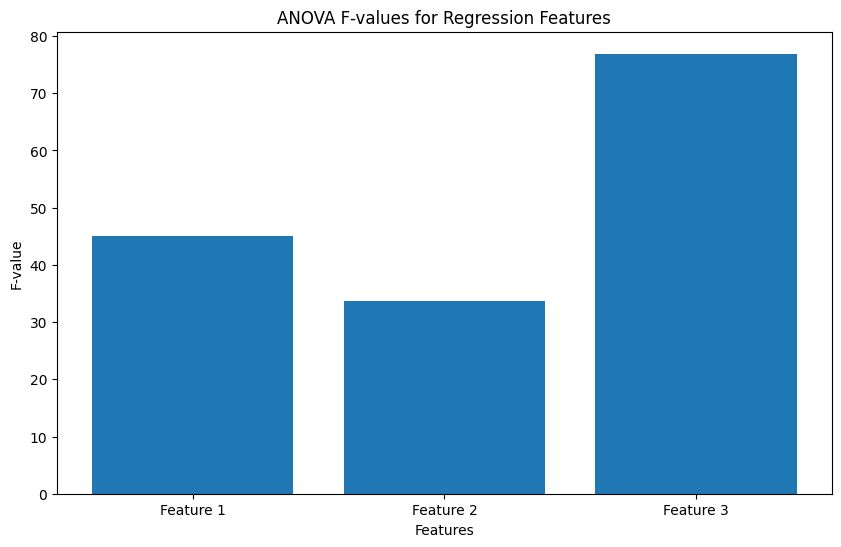

In [3]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=3, noise=0.1)

# Fit the model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Perform ANOVA
F, p_values = f_regression(X, y)

print(f"F-values: {F}")
print(f"P-values: {p_values}")

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(F)+1), F, tick_label=[f'Feature {i}' for i in range(1, len(F)+1)])
plt.title('ANOVA F-values for Regression Features')
plt.xlabel('Features')
plt.ylabel('F-value')
plt.show()


### Confidence intervals

A confidence interval, from the frequentist standpoint, is an interval estimate of a parameter $\beta_j$ that, if the same data collection and analysis procedure were repeated many times, would contain the true parameter value a certain percentage (e.g., 95%) of the time $\beta_j$. This is because in frequentist statistics, parameters are considered fixed but unknown quantities. The data are random, which means the calculated confidence interval varies from sample to sample. Saying a 95\% confidence interval for a parameter is $[a, b]$ means that if we were to repeat the study many times, 95% of such calculated intervals would contain the true parameter value. It does not mean there is a 95% probability that the true parameter lies within that specific interval for the observed data. Conversely, Bayesian methods treat parameters as random variables and provide a probability distribution (the posterior distribution) that quantifies uncertainty about parameter values given the observed data. The uncertainty about a parameter is directly quantified by its posterior distribution. A 95% credible interval from Bayesian analysis means there is a 95% probability that the parameter lies within this interval, given the data and the prior information. Frequentist confidence intervals do not allow for probabilistic statements about the parameter being within the interval for a given dataset. In contrast, Bayesian credible intervals provide a probability that the parameter lies within the interval, given the data and prior.



### Confidence intervals on individual regression coefficients
So far, we have demonstrated that $\widehat{\boldsymbol{\beta}} \sim \mathcal{N}(\boldsymbol{\beta}, \sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1})$. This also implied that the marginal distribution for any regression coefficient is $\widehat{\beta}_j \sim \mathcal{N}(\beta_j, \sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1}_{jj})$. Then, we can say that

\begin{equation}
    \frac{\widehat{\beta}_j - \beta_j}{\sqrt{\sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1}_{jj}}} \sim \mathcal{N}(0, 1) 
\end{equation}

Since we do not know $\sigma^2$, we used its estimate $\widehat{\sigma}^2$ obtained through the $\operatorname{MS}_E$, which has a $\chi^2$ distribution with $n-p$ degrees of freedom. Thus, we have 

\begin{equation}
    \frac{\widehat{\beta}_j - \beta_j}{\sqrt{\widehat{\sigma}^2 (\mathbf{X}^\top \mathbf{X})^{-1}_{jj}}} \sim t_{n-p}
\end{equation}

We can then define a 100$(1-\alpha)\%$ confidence interval for the regression coefficient $\beta_j$, $j = 0,1,\ldots, p$, as

\begin{equation}
    \widehat{\beta}_j - t_{\alpha/2, n-p} \sqrt{\hat{\sigma}^2 (\mathbf{X}^\top \mathbf{X})^{-1}_{jj}} \leq \beta_j \leq \widehat{\beta}_j + t_{\alpha/2, n-p} \sqrt{\hat{\sigma}^2 (\mathbf{X}^\top \mathbf{X})^{-1}_{jj}}
\end{equation}

where $t_{\alpha/2, n-p}$ is the critical value from the t-distribution for $\alpha/2$ and $n-p$ degrees of freedom. This can also be written in terms of the standard error of the estimated coefficient $b_j$ as

\begin{equation}
    \widehat{\beta}_j - t_{\alpha/2, n-p} \text{se}(\widehat{\beta}_j) \leq \beta_j \leq \widehat{\beta}_j + t_{\alpha/2, n-p} \text{se}(\widehat{\beta}_j)
\end{equation}

#### Confidence interval on the mean response and prediction variance
We can define a confidence interval on the mean response at a particular point $\mathbf{x}_0$. The fitted value at this particular point is

\begin{equation}
    \widehat{y}_0 = \mathbf{x}_0^\top \widehat{\boldsymbol{\beta}}
\end{equation}

Because we have $\mathbf{y} \sim \mathcal{N}(\mathbf{X} \boldsymbol{\beta}, \sigma^2\mathbf{I}_n)$, suggesting how $\mathbb{E}[y|\mathbf{X}] = \mathbf{X} \boldsymbol{\beta}$, we also have that $\mathbb{E}[y|\mathbf{x}_0] = \mathbf{x}_0^\top \boldsymbol{\beta}$. Then, we have

\begin{equation}
     \mathbb{E}[\widehat{y}_0] = \mathbb{E}[\mathbf{x}_0^\top \widehat{\boldsymbol{\beta}}] = \mathbf{x}_0^\top \boldsymbol{\beta}
\end{equation}

because $\mathbb{E}[\widehat{\boldsymbol{\beta}}] = \boldsymbol{\beta}$. Thus, $\widehat{y}_0$ is an unbiased estimator of $\mathbb{E}[y|\mathbf{x}_0]$. Since $\widehat{y}_0$ is a linear combination of $\widehat{\boldsymbol{\beta}}$, which has a variance of $\sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1}$, the variance of $\widehat{y}_0$ is given by

\begin{equation}
    \operatorname{Var}[\widehat{y}_0] = \operatorname{Var}\left[\mathbf{x}_0^\top \widehat{\boldsymbol{\beta}}\right] = \mathbf{x}_0^\top(\sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1})\mathbf{x}_0 = \sigma^2\mathbf{x}_0^\top(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{x}_0
\end{equation}



Then, we can define the 100(1-$\alpha$)\% confidence interval on the mean response at point $\mathbf{x}_0$ as

\begin{equation}
    \widehat{y}_0 - t_{\alpha/2, n-p} \sqrt{\sigma^2\mathbf{x}_0^\top(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{x}_0} \leq \mathbb{E}[y|\mathbf{x}_0] \leq \widehat{y}_0 + t_{\alpha/2, n-p} \sqrt{\sigma^2\mathbf{x}_0^\top(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{x}_0}
\end{equation}

In general, we can define the **prediction variance (PV)** of the fitted value at location $\mathbf{x}_0$ as

\begin{equation}
    \operatorname{PV} = \operatorname{Var}[\widehat{y}_0] = \sigma^2\mathbf{x}_0^\top(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{x}_0
\end{equation}

Then, the **unscaled prediction variance (UPV)** is given by 

\begin{equation}
    \operatorname{UPV} = \frac{\operatorname{Var}[\widehat{y}_0]}{\sigma^2} = \mathbf{x}_0^\top(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{x}_0
\end{equation}

The main benefit of the UPV is that it can be used during the design selection phase. The division
by $\sigma^2$ means that \underline{UPV is a function of only the design matrix} and does not require data to have been collected. UPV provides a way to quantify the precision of the predictions made by a regression model at specific points. It tells us how much the predicted value at a certain point $\mathbf{x}_0$ is expected to vary, due to the variability in the estimated regression coefficients, but without considering the inherent variability of the response itself. The key intuition is that since $\widehat{\boldsymbol{\beta}}$ carries variance, any prediction made using these estimates also inherits variance (i.e., uncertainty propagation?). UPV connects parameter estimation to prediction variance by translating the uncertainty in the model's coefficients into the uncertainty of the model's predictions. If we have already collected data, we can try to estimate $\sigma^2$ using the $\operatorname{MS}_E$. Then, we can define the **estimated prediction variance (EPV)** as

\begin{equation}
    \operatorname{EPV} = \widehat{\sigma}^2\mathbf{x}_0^\top(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{x}_0
\end{equation}

#### Joint confidence region on the regression coefficients (confidence ellipsoid)

The confidence intervals in the previous subsection should be thought of as one-at-a-time intervals. We can also define a **confidence ellipsoid** representing the region in which the true coefficients $\boldsymbol{\beta}$ are likely to be found, given the estimated coefficients $\widehat{\boldsymbol{\beta}}$ and a certain level of confidence $\alpha$. The ellipsoid provides a geometrical assessment of the uncertainty associated with the estimated coefficients. It shows how these estimates might vary due to the variability in the data used to calculate them. The volume and shape of the ellipsoid depend on the precision of the estimates: a smaller ellipsoid indicates more precise estimates. 

##### Mahalanobis distance
Before introducing the confidence ellipsoid, let us provide a quick intuition and recap regarding Mahalanobis distance, which is particularly useful in statistics for understanding the distribution of multivariate data, creating confidence regions around means or model parameters, and identifying outliers. Let us start from the PDF of a multivariate normal distribution with mean vector $\boldsymbol{\mu}$ and covariance matrix $\boldsymbol{\Sigma}$

\begin{equation}
    f(x) = \frac{1}{\sqrt{2\pi^p \operatorname{det}(\boldsymbol{\Sigma})}}e^{-\frac{1}{2}(\mathbf{x}- \boldsymbol{\mu})^\top \boldsymbol{\Sigma}^{-1}(\mathbf{x}- \boldsymbol{\mu})}
\end{equation}

The term inside the exponential function, $(\mathbf{x}- \boldsymbol{\mu})^\top \boldsymbol{\Sigma}^{-1}(\mathbf{x}- \boldsymbol{\mu})$, is the squared Mahalanobis distance between the point $\mathbf{x}$ and the mean $\boldsymbol{\mu}$. This term essentially measures how far $\mathbf{x}$ is from the mean, adjusted for the spread and correlation structure of the variables as given by the covariance matrix $\boldsymbol{\Sigma}$. More generally, given a probability distribution $Q$ with mean $\boldsymbol{\mu}$ and positive-definite covariance matrix $\boldsymbol{\Sigma}$, the Mahalanobis distance of a point $\mathbf{x}$ from $Q$ is given by

\begin{equation}
    d_M = \sqrt{(\mathbf{x}- \boldsymbol{\mu})^\top \boldsymbol{\Sigma}^{-1}(\mathbf{x}- \boldsymbol{\mu})}
\end{equation}

Data points with the same Mahalanobis distance form an ellipsoid in the multidimensional space, centered at the mean, where the covariance matrix determines the size, shape, and orientation of the ellipsoid. Given the ellipsoid $\mathcal{E}$ defined by 

\begin{equation}
    (\mathbf{x}- \boldsymbol{\mu})^\top \boldsymbol{\Sigma}^{-1}(\mathbf{x}- \boldsymbol{\mu}) \leq k
\end{equation}

we know that

\begin{equation}
    \operatorname{Vol}(\mathcal{E}) \propto \sqrt{\operatorname{det}(\boldsymbol{\Sigma})}
\end{equation}

which means that the volume of the ellipsoid is inversely proportional to the square root of the determinant of $\boldsymbol{\Sigma}^{-1}$.
 
#### Confidence ellipsoid We can define an ellipsoid for the regression coefficients $\boldsymbol{\beta}$ as 

\begin{equation}
    (\widehat{\boldsymbol{\beta}}-\boldsymbol{\beta})^\top (\sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1})^{-1}(\widehat{\boldsymbol{\beta}}-\boldsymbol{\beta}) = \frac{(\widehat{\boldsymbol{\beta}}-\boldsymbol{\beta})^\top \mathbf{X}^\top \mathbf{X}(\widehat{\boldsymbol{\beta}}-\boldsymbol{\beta})}{\sigma^2}
\end{equation}

Since we estimate $\sigma^2$ with $\operatorname{MS}_E$, we get 

\begin{equation}
    \frac{(\widehat{\boldsymbol{\beta}}-\boldsymbol{\beta})^\top \mathbf{X}^\top \mathbf{X}(\widehat{\boldsymbol{\beta}}-\boldsymbol{\beta})}{p\widehat{\sigma}^2} \sim F_{p, n-p}
\end{equation}

This holds because the quadratic form $(\widehat{\boldsymbol{\beta}}-\boldsymbol{\beta})^\top \mathbf{X}^\top \mathbf{X}(\widehat{\boldsymbol{\beta}}-\boldsymbol{\beta})$ is a sum of squared normal variables (since $\widehat{\boldsymbol{\beta}}-\boldsymbol{\beta}$ is a vector of normally distributed errors) and thus follows a $\chi^2_p$ distribution (that is why we divide it by $p$ too). Since $\widehat{\sigma}^2$ follows a $\chi^2_{n-p}$ distribution, then the ratio of the two Chi-squares is distributed as an F-distribution. Consequently,  a $100(1-\alpha)$\% joint confidence region $\mathcal{E}$ for all the parameters in $\boldsymbol{\beta}$ is given by

\begin{equation}
    \frac{(\widehat{\boldsymbol{\beta}}-\boldsymbol{\beta})^\top \mathbf{X}^\top \mathbf{X}(\widehat{\boldsymbol{\beta}}-\boldsymbol{\beta})}{p\widehat{\sigma}^2} \leq F_{\alpha, p, n-p}
\end{equation}

From the properties of the ellipsoids we know that the volume of this region is inversely proportional to the square root of the determinant of $\mathbf{X}^\top \mathbf{X}$. 

\begin{equation}
    \operatorname{Vol}(\mathcal{E}) \propto \sqrt{\operatorname{det}(\mathbf{X}^\top \mathbf{X})^{-1}}
\end{equation}

Thus, maximizing $\operatorname{det}(\mathbf{X}^\top \mathbf{X})$ minimizes the volume of the ellipsoids (**D-optimality**). A smaller confidence ellipsoid implies that the range of values that the regression coefficients could plausibly take (given the data and the model) is more tightly constrained. This means that we can be more confident about where these parameters lie. In practical terms, it leads to narrower confidence intervals for each coefficient, indicating increased precision in our estimates.


## Conditional expectations/causality: observational data vs. designed experiments

When the coefficients $\widehat{\beta}_0$ and $\widehat{\beta}_1$ are estimated from a sample of $n$ observations, they will be the result of the specific values $\{x_i, y_i\}$ observed in that sample. This means they are subject to the variability and characteristics of that particular sample. For this reason, when we try to derive the expectation or variance of these quantities, they will be conditional on the observed values: $\mathbb{E}[\widehat{\beta}_1|x_1, \ldots, x_n]$, $\operatorname{Var}[\widehat{\beta}_1|x_1, \ldots, x_n]$. In experiments where the researcher controls or sets the values of $x_i$ (designed or controlled experiments), these $x_i$ values are treated as non-random and fixed. In such scenarios, the conditioning on $x_i$ values can be ignored for the purposes of calculating the expectation and variance of the estimated coefficients. This is because, in these cases, the variability in the estimates comes only from the $y_i$ values, as the $x_i$ values are constant and known. In observational studies or experiments where $x_i$ values are not controlled and can vary, the expectation and variance of the coefficients would need to account for the randomness in both $x_i$ and $y_i$ values. So, if we have only observational data (where $x$'s are random), we might be interested in finding $\mathbb{E}[\widehat{\beta}_1]$ and $\operatorname{Var}[\widehat{\beta}_1]$, not just $\mathbb{E}[\widehat{\beta}_1|x_1, \ldots, x_n]$ and $\operatorname{Var}[\widehat{\beta}_1|x_1, \ldots, x_n]$. 

We can think of the slope as the average change in $Y$ for a one-unit change in $X$. Mathematically, this can be expressed as

\begin{equation}
    \beta_1 = \mathbb{E}[Y|X=x] - \mathbb{E}[Y|X=x-1]
\end{equation}

where we applied a change of one unit to $x$. For any $x_1, x_2$ we can write 

\begin{equation}
    \beta_1 = \frac{\mathbb{E}[Y|X=x_2] - \mathbb{E}[Y|X=x_1]}{x_2-x_1}
\end{equation}

where we are simply saying that the slope of a regression line is given by the ratio of rise (difference on the $y$ axis) and run (difference on the $x$ axis). While the slope $\beta_1$ quantifies the association between $X$ and $Y$, it should not automatically be interpreted as a causal effect. If we only deal with observation data, The appropriate way to understand $\beta_1$ is as an expected difference, not as a causal effect. It should be interpreted as, ``If we compare two groups from the un-manipulated distribution of $X$ where $X$ differs by one unit, we expect $Y$ to differ, on average, by $b_1$ units''. This interpretation holds regardless of whether there's a causal relationship between $X$ and $Y$.


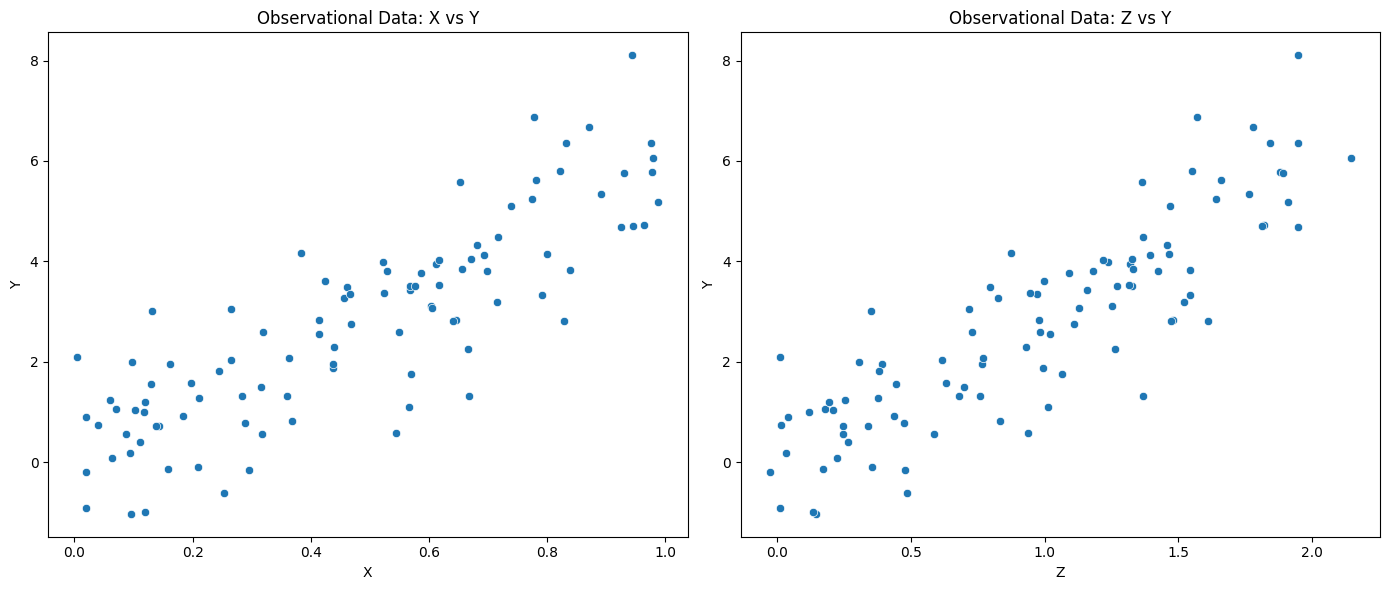

In [4]:
import pandas as pd
import seaborn as sns

# Generate synthetic observational data
np.random.seed(0)
size = 100
X = np.random.rand(size)
Z = 2 * X + np.random.randn(size) * 0.1
Y = 3 * Z + np.random.randn(size)

data = pd.DataFrame({'X': X, 'Z': Z, 'Y': Y})

# Plotting
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='X', y='Y')
plt.title('Observational Data: X vs Y')

plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='Z', y='Y')
plt.title('Observational Data: Z vs Y')

plt.tight_layout()
plt.show()


## Model selection criteria: AIC and BIC
Model selection is a critical step in statistical modeling, aiming to identify the most appropriate model that explains the data without overfitting. Two widely used criteria for model selection are the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). Both criteria are grounded in information theory and aim to balance the goodness of fit of the model with its complexity. The AIC is a measure of the relative quality of a statistical model for a given set of data. It assesses the trade-off between the goodness of fit of the model and its complexity (measured by the number of parameters in the model). The AIC is defined as:

\begin{equation}
    \text{AIC} = 2k - 2\ln(L)
\end{equation}

where $k$ is the number of parameters in the model, and $L$ is the maximum value of the likelihood function for the model. A lower AIC value indicates a better model. The AIC encourages model parsimony, so it penalizes the addition of unnecessary parameters.

The BIC, is similar to the AIC but introduces a stronger penalty for models with more parameters. The BIC is given by:

\begin{equation}
    \text{BIC} = \ln(n)k - 2\ln(L)
\end{equation}

where $n$ is the number of observations, $k$ is the number of parameters, and $L$ is the likelihood of the model. Like the AIC, the model with the lowest BIC is generally preferred. The BIC's penalty term is larger than that of the AIC when the sample size $n$ is greater than 7, making it more stringent against complex models.

Both AIC and BIC aim to select models that are parsimonious and well-fitting. The main differences between them lie in their penalty terms; the BIC penalizes model complexity more heavily than the AIC, especially as the sample size increases. This can lead to different model choices, particularly in situations with large datasets or many candidate models. In practice, AIC is often used when the primary goal is predictive accuracy, as it tends to favor more complex models that might capture the data better. BIC is used when the goal is to find the true model among the set of candidates, as it leans towards simpler models due to its higher penalty on the number of parameters. Both criteria are essential tools in model selection, providing a balance between simplicity and the ability to fit the data. However, they should not be used blindly. It's important to consider the context of the modeling problem, including the goals of the analysis and the nature of the data, when deciding which criterion to use or whether to use them in conjunction with other model selection methods.


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 3)
y = 4 + 3 * X[:, 0] + 2 * X[:, 1] + np.random.randn(100)

# Fit multiple models
model1 = OLS(y, sm.add_constant(X[:, :1])).fit()
model2 = OLS(y, sm.add_constant(X[:, :2])).fit()
model3 = OLS(y, sm.add_constant(X)).fit()

# Print AIC and BIC for each model
print(f"Model 1: AIC={model1.aic}, BIC={model1.bic}")
print(f"Model 2: AIC={model2.aic}, BIC={model2.bic}")
print(f"Model 3: AIC={model3.aic}, BIC={model3.bic}")


Model 1: AIC=366.89403845207, BIC=372.1043788240462
Model 2: AIC=275.8424794159408, BIC=283.65798997390505
Model 3: AIC=277.27997777109255, BIC=287.7006585150449


## Regularization methods

Regularization techniques are fundamental to the field of machine learning and statistics, primarily used to prevent overfitting, improve model generalization, and handle multicollinearity among predictors. This section delves into three popular regularization methods: Lasso (L1 penalty), Ridge (L2 penalty), and Elastic Net (combination of L1 and L2 penalties).

### Lasso Regression (L1 Penalty)
Lasso (Least Absolute Shrinkage and Selection Operator) regression introduces a penalty term equal to the absolute value of the magnitude of coefficients to the loss function. The objective function of Lasso regression is given by:

\begin{equation}
3\text{minimize} \; \left\{ \frac{1}{2n} \sum_{i=1}^{n} (y_i - x_i^\top \beta)^2 + \lambda \sum_{j=1}^{p} |\beta_j| \right\},
\end{equation}

where $\lambda$ is a regularization parameter that controls the strength of the penalty.

- Promotes sparsity in the model coefficients, effectively performing feature selection.
- Particularly useful when dealing with high-dimensional data or when feature selection is desired.
- Can result in models that are easier to interpret due to fewer predictors.


### Ridge Regression (L2 Penalty)
Ridge regression adds a penalty equal to the square of the magnitude of coefficients to the loss function. The formulation of Ridge regression is as follows:

\begin{equation}
    \text{minimize} \; \left\{ \frac{1}{2n} \sum_{i=1}^{n} (y_i - x_i^\top \beta)^2 + \lambda \sum_{j=1}^{p} \beta_j^2 \right\},
\end{equation}

where $\lambda$ is the regularization parameter.

- Reduces model complexity by shrinking coefficients, but does not necessarily reduce them to zero.
- Particularly beneficial in situations with multicollinearity among predictors.
- Helps to stabilize the coefficient estimates and improve model generalization.


### Elastic Net (Combination of L1 and L2 Penalties)
Elastic Net combines the penalties of Lasso and Ridge, incorporating both the L1 and L2 penalty terms. The objective function for Elastic Net is:

\begin{equation}
    \text{minimize} \; \left\{ \frac{1}{2n} \sum_{i=1}^{n} (y_i - x_i^\top \beta)^2 + \lambda_1 \sum_{j=1}^{p} |\beta_j| + \frac{\lambda_2}{2} \sum_{j=1}^{p} \beta_j^2 \right\},
\end{equation}

where $\lambda_1$ and $\lambda_2$ are parameters that control the strength of the L1 and L2 penalties, respectively.

- Combines the feature selection properties of Lasso with the ridge regression's ability to handle multicollinearity.
- Encourages a grouping effect, where correlated predictors either enter or leave the model together.
- Offers a balance between Lasso and Ridge regression by allowing for control over both penalties, making it versatile for various scenarios.
- Useful in high-dimensional data scenarios where Lasso might suffer due to high correlations among predictors.


Each of these regularization methods has its unique strengths and applications, and the choice among them should be guided by the specific characteristics of the data and the modeling objectives at hand.

Ridge MSE: 4.766846557940456
Lasso MSE: 0.10241540029791293


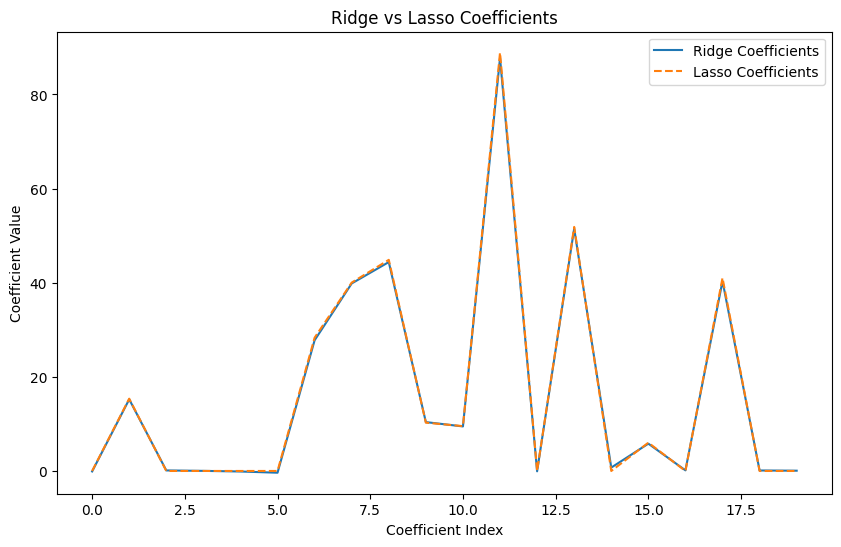

In [6]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(0)
X, y = make_regression(n_samples=100, n_features=20, noise=0.1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit Lasso and Ridge regression models
ridge_reg = Ridge(alpha=1.0)
lasso_reg = Lasso(alpha=0.1)

ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

# Predict and evaluate
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

print(f"Ridge MSE: {ridge_mse}")
print(f"Lasso MSE: {lasso_mse}")

# Plotting coefficients
plt.figure(figsize=(10, 6))
plt.plot(ridge_reg.coef_, label='Ridge Coefficients')
plt.plot(lasso_reg.coef_, label='Lasso Coefficients', linestyle='--')
plt.title('Ridge vs Lasso Coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()
